In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# Count plot

>seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

In [5]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

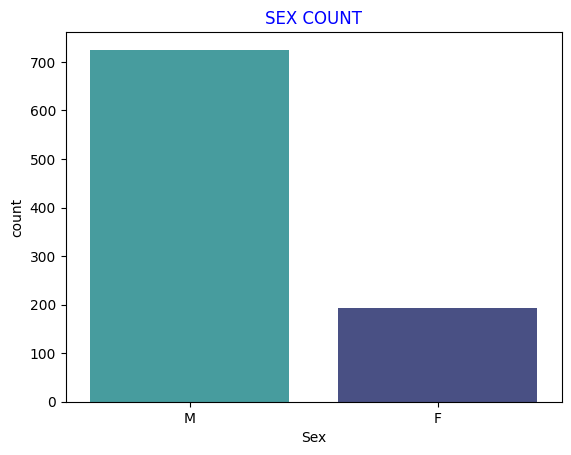

In [6]:
sns.countplot(x="Sex", data=df, palette="mako_r")
plt.title("SEX COUNT", size=12, c='b')
plt.show()

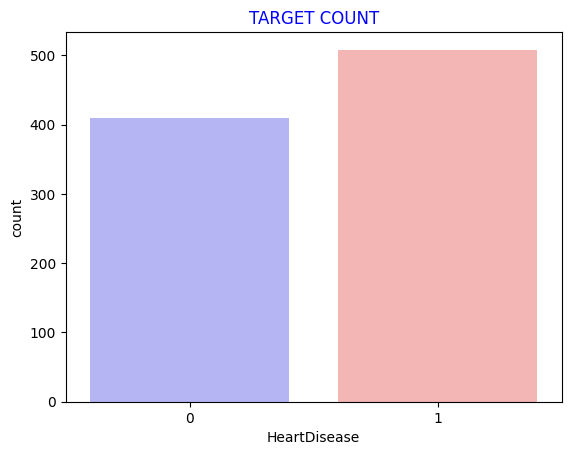

In [7]:
sns.countplot(x="HeartDisease", data=df, palette="bwr")
plt.title("TARGET COUNT", size=12, c='b')
plt.show()

# Distplot

> The seaborn.distplot() represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

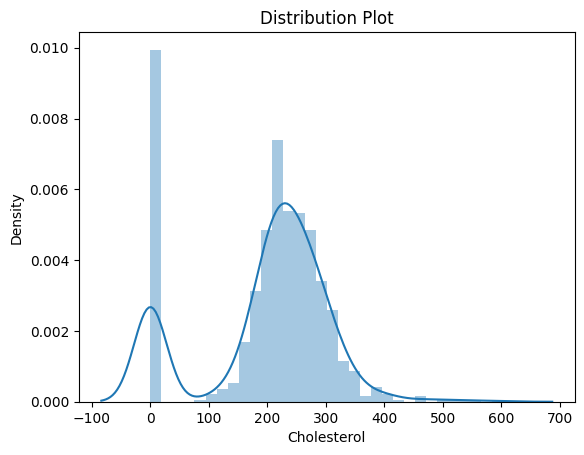

In [8]:
plt.title("Distribution Plot")
sns.distplot(df["Cholesterol"])
plt.show()

# Scatter Plot

> A scatterplot is a type of data display that shows the relationship between two numerical variables.

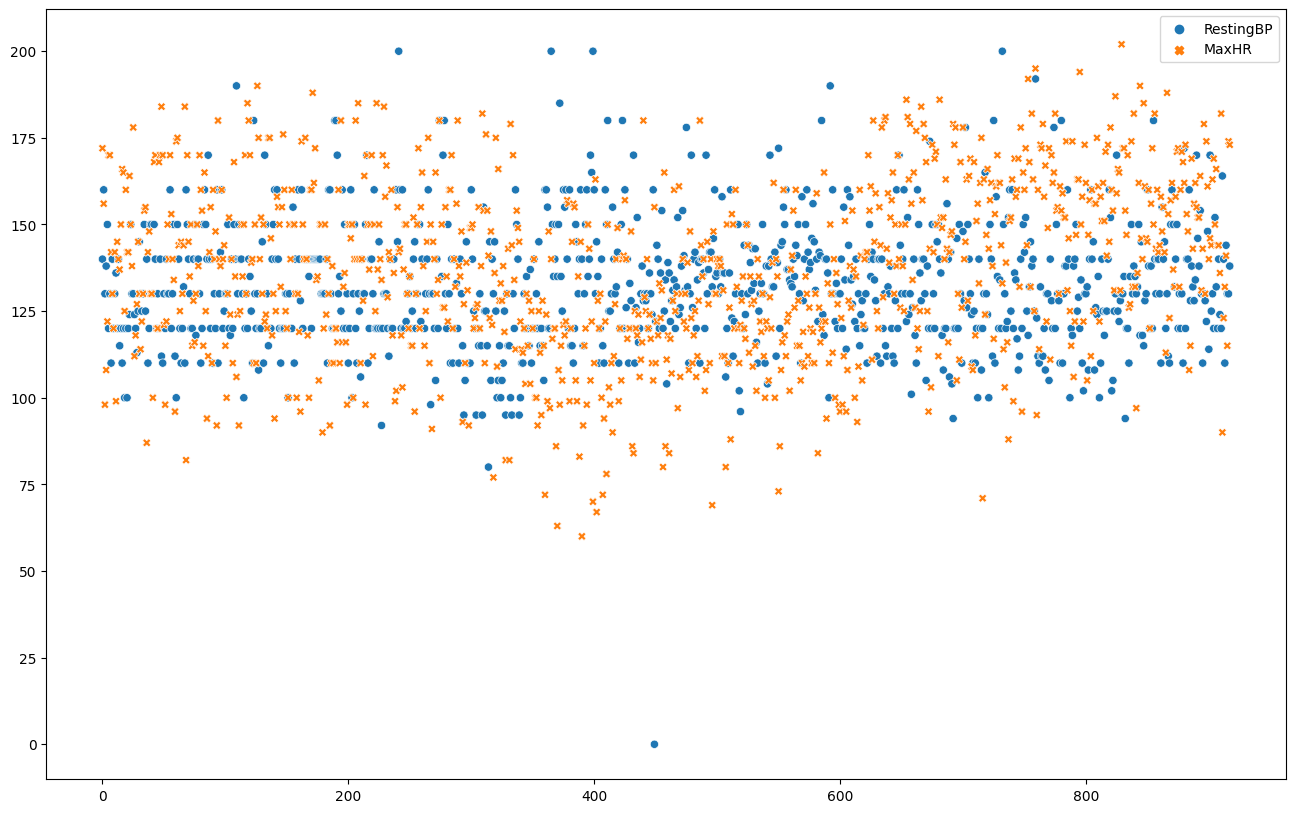

In [9]:
plt.figure(figsize=(16, 10))
sns.scatterplot([df.RestingBP, df.MaxHR])
plt.show()

# Grouped BarPlot

> A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent.

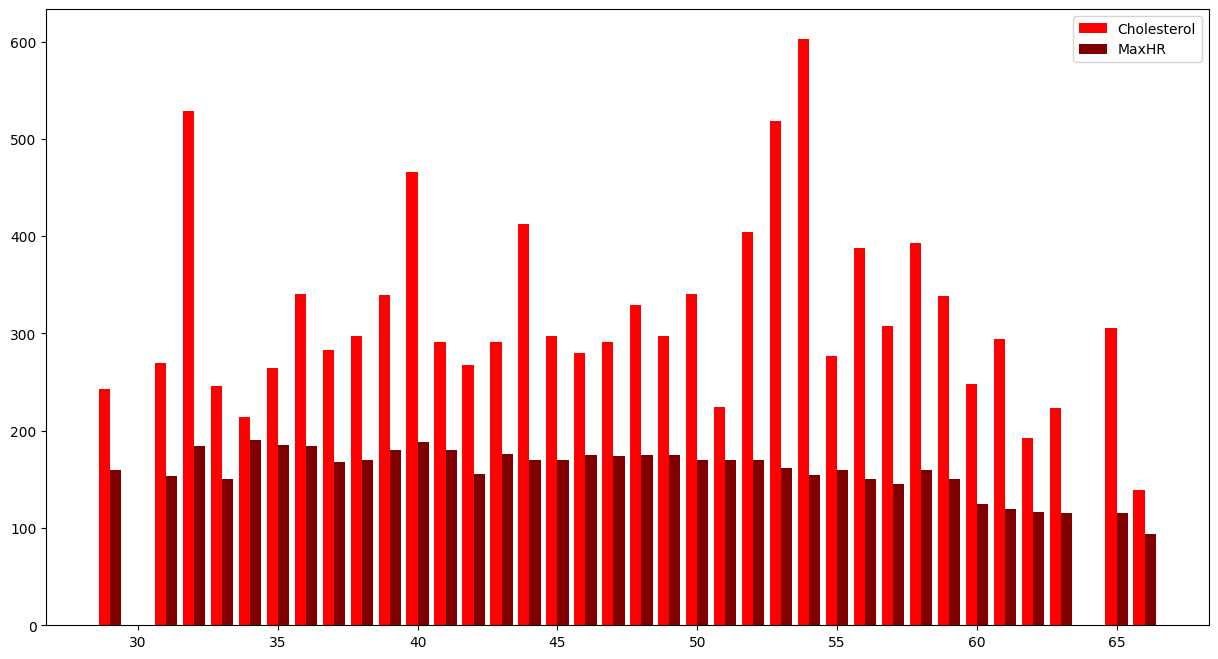

In [10]:
plt.figure(figsize=(15,8))
width=0.4
plt.bar(df.Age[:200]-0.2, df.Cholesterol[:200], width, color="red")
plt.bar(df.Age[:200]+0.2, df.MaxHR[:200], width, color="maroon")
plt.legend(['Cholesterol', 'MaxHR'])
plt.show()

**pandas.crosstab()**

 *Same as pivot_table()*

> Crosstabs are used for categorical data, while pivot tables can be used for both categorical and numerical data. Crosstabs are used to analyze the relationship between two categorical variables, while pivot tables can analyze the relationships between multiple variables, both categorical and numerical.




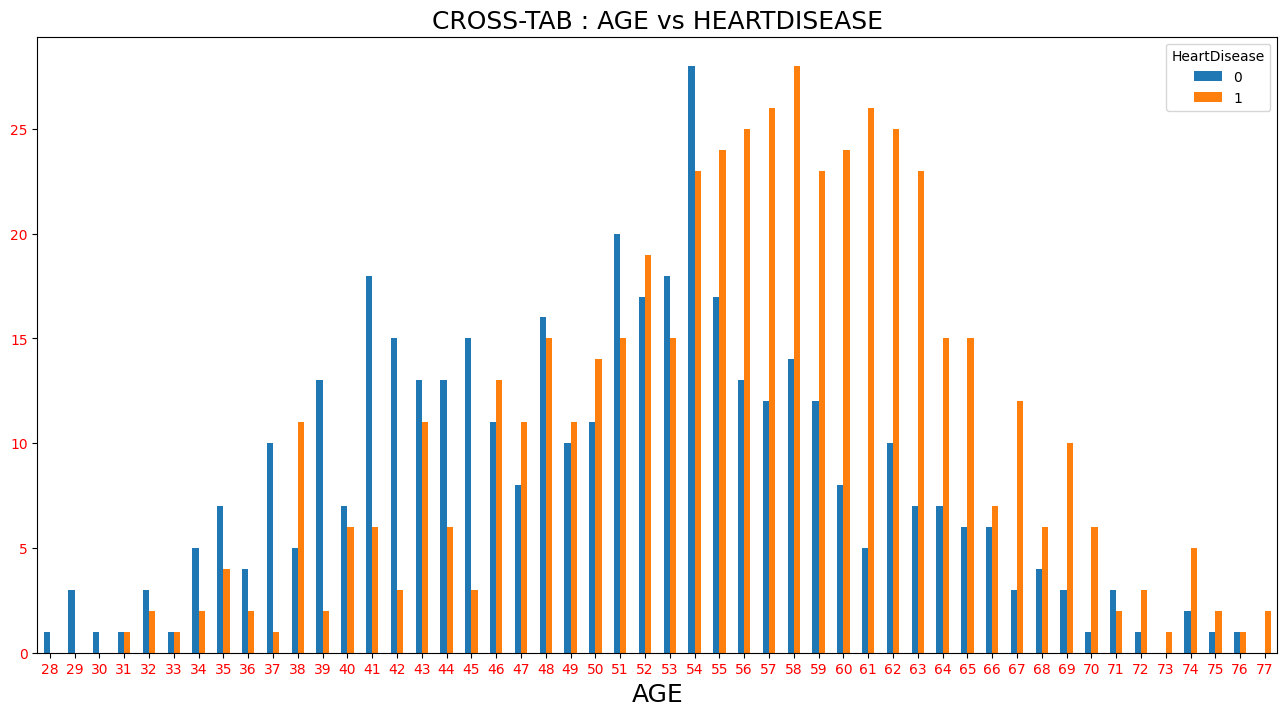

In [11]:
pd.crosstab(df.Age, df.HeartDisease).plot(kind="bar", figsize=(16,8))
plt.xticks(rotation="horizontal", c='r')
plt.yticks(c='r')
plt.title("CROSS-TAB : AGE vs HEARTDISEASE", size=18)
plt.xlabel("AGE", size="18")
plt.show()

# Histogram

> A histogram is a representation of the distribution of data.

<Axes: xlabel='Age', ylabel='Count'>

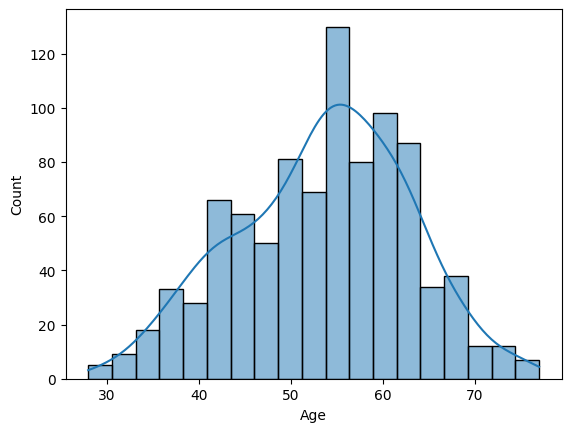

In [12]:
sns.histplot(df['Age'], kde=True)

<Axes: ylabel='Frequency'>

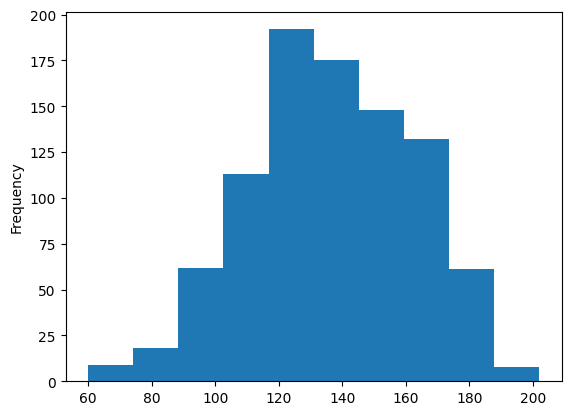

In [13]:
df.MaxHR.plot(kind="hist")

In [14]:
hist_lis = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
hist_lis

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

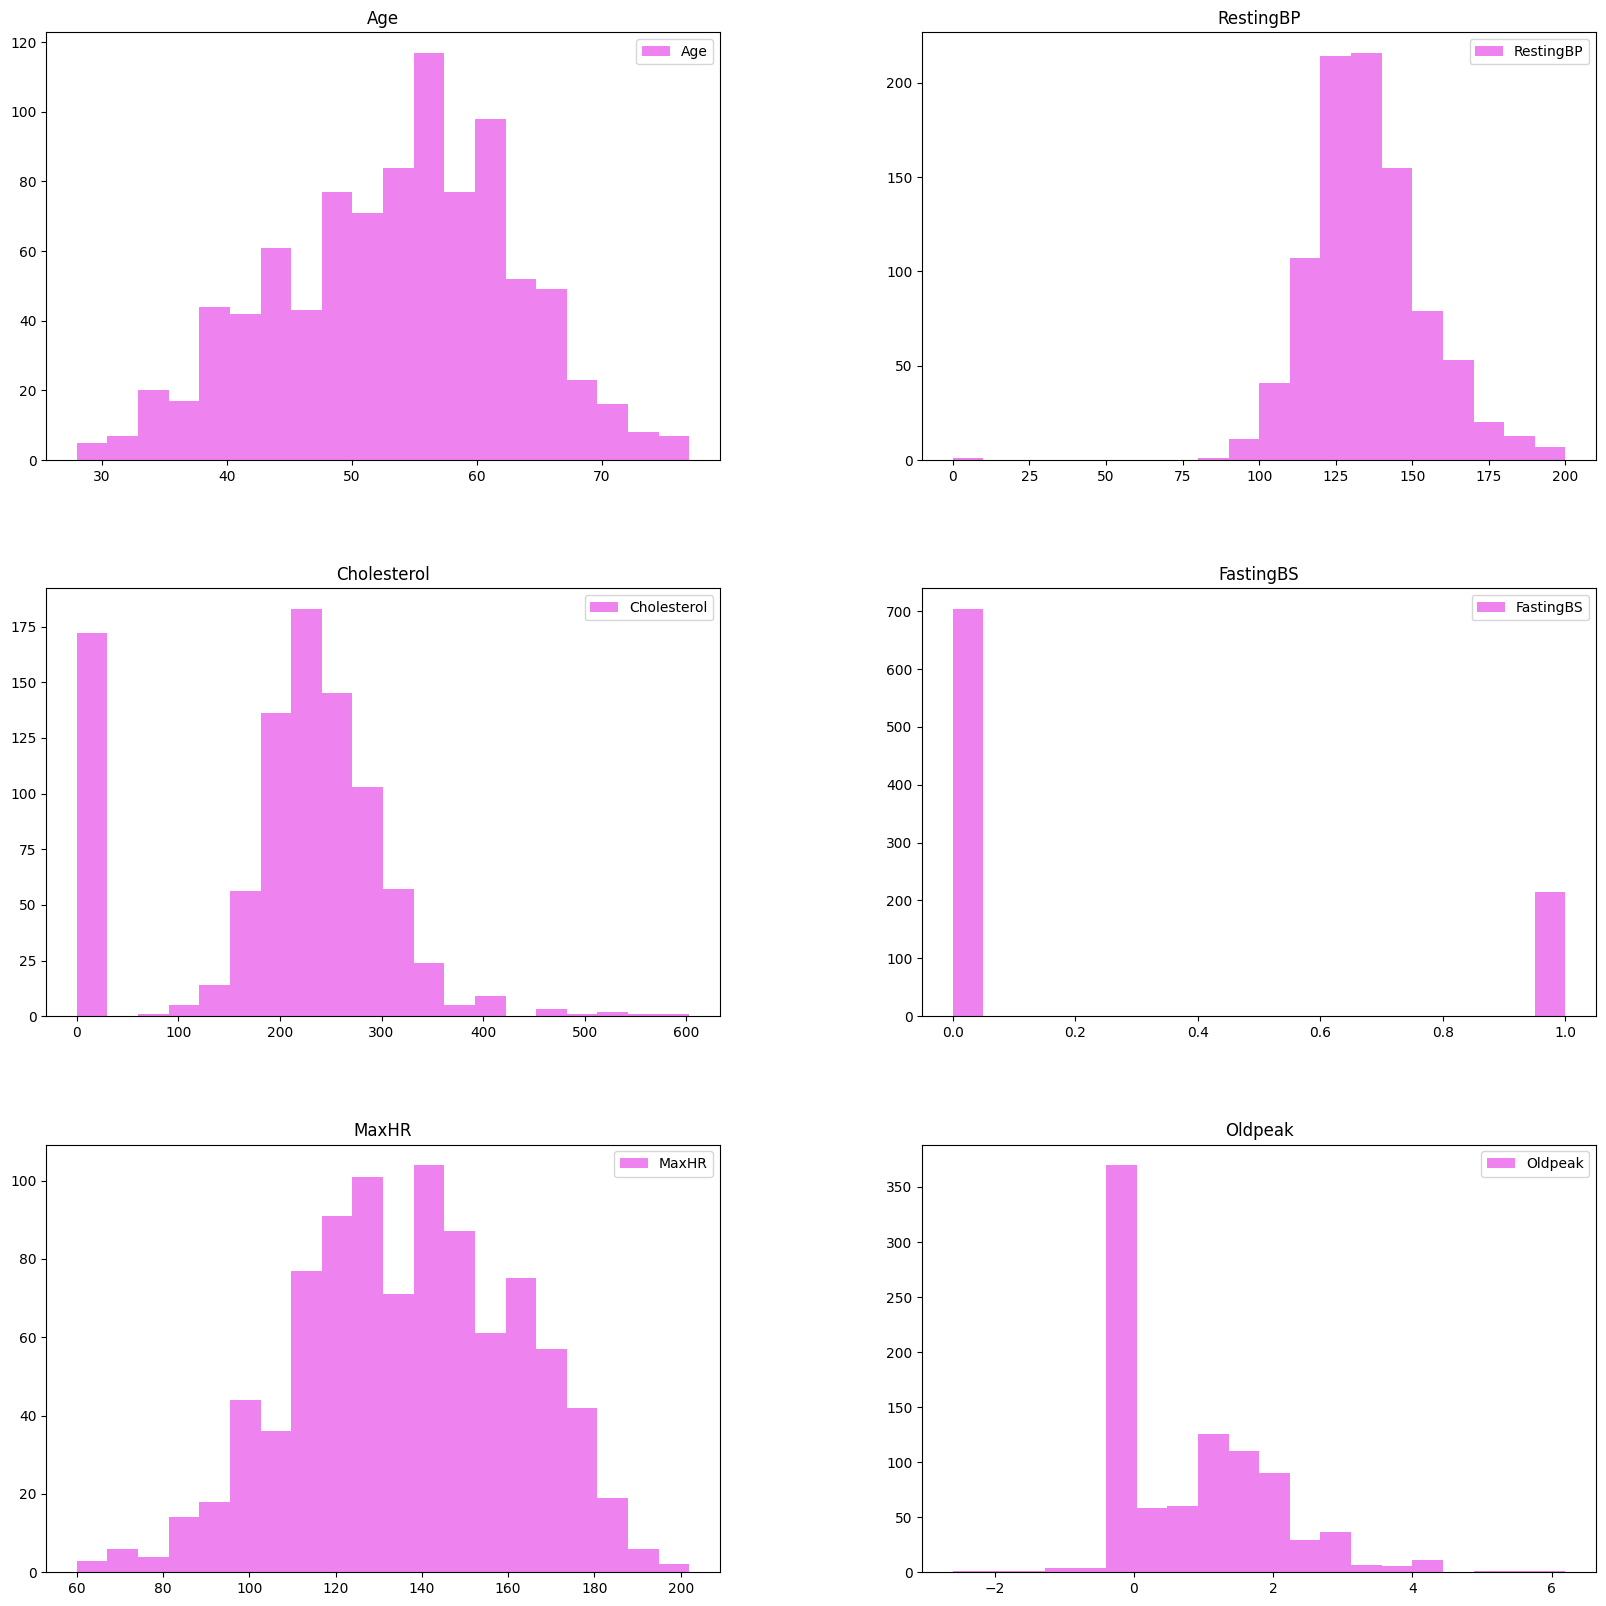

In [15]:
df.hist(hist_lis,
        figsize=(20,20),
        grid=False,
        bins=20,
        color="violet",
        legend=True)
plt.show()

# Boxplot

> A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are.

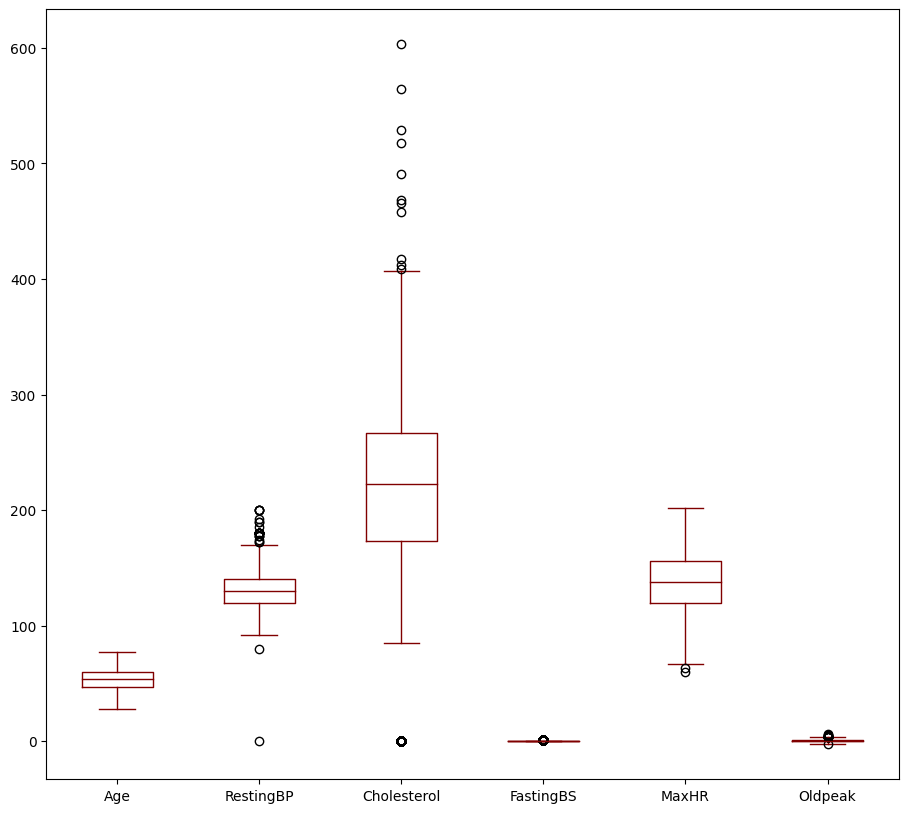

In [34]:
df.boxplot(hist_lis,
          figsize=(11,10),
          color="maroon",
          grid=False)
plt.show()

<Axes: >

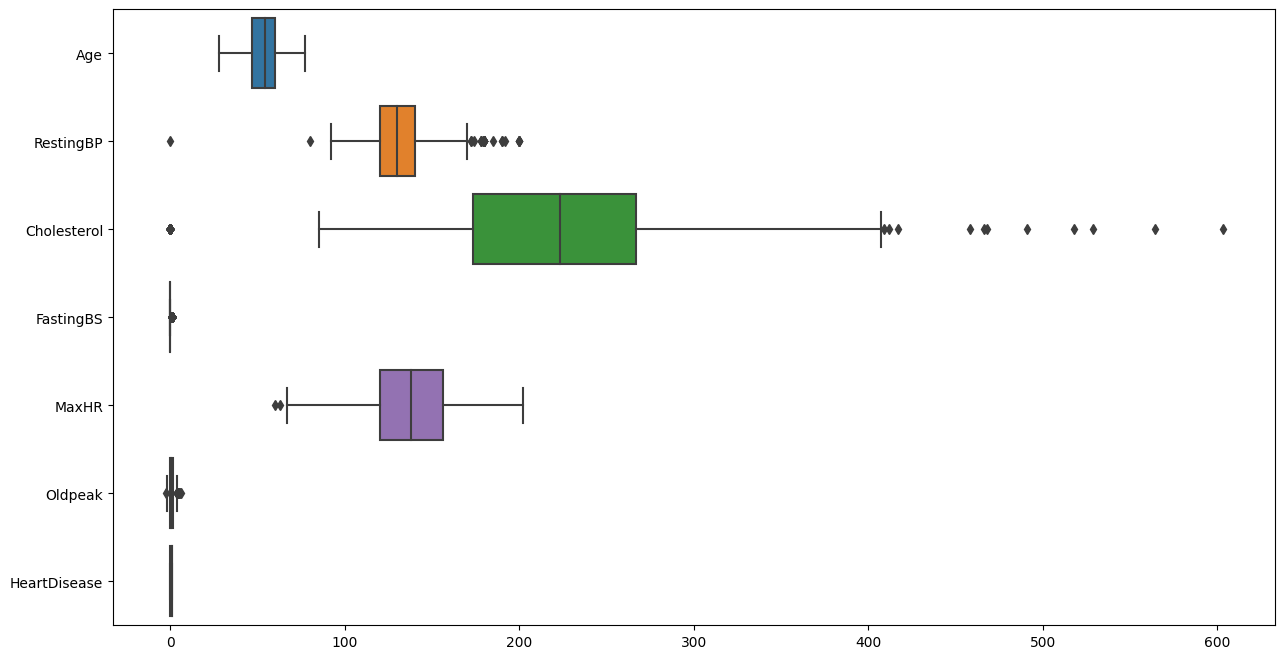

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(df, orient='h')

([<matplotlib.patches.Wedge at 0x7f1b9623a020>,
 [Text(0.6100667146441068, 0.9153243161215296, 'low'),
  Text(-1.0419233031728248, -0.35269793067925703, 'mid'),
  Text(0.8713415624311371, -0.6713895155422559, 'hight')])

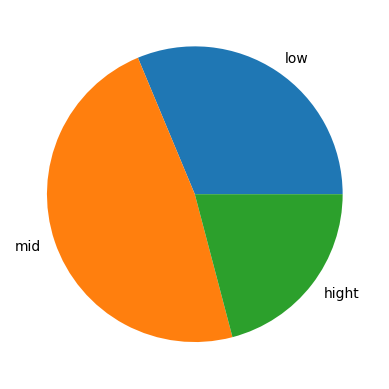

In [4]:
dp = df.HeartDisease
ns = dp.groupby(pd.cut(df['RestingBP'],[100,120,140,160])).count()
plt.pie(ns,labels=['low','mid','hight'])